In [0]:
pip install mpld3

In [0]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [0]:
from google.colab import files
uploaded = files.upload()

Saving hi.txt to hi.txt


In [0]:
fp = open("hi.txt", "r+")

synopses = [fp.readline()[:-1] for x in range(500)]
# synopses= fp.readlines()[1:-1]

print(synopses)
print(synopses[400][0:9])

['अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें', 'एक्सेर्साइसर पहुंचनीयता अन्वेषक', 'निचले पटल के लिए डिफोल्ट प्लग-इन खाका', 'ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका', 'उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से निष्क्रिय किया गया है', 'अवधि को हाइलाइट रकें', 'पहुंचनीय आसंधि (नोड) को चुनते समय हाइलाइट बक्से की अवधि', 'सीमांत (बोर्डर) के रंग को हाइलाइट करें', 'हाइलाइट किए गए सीमांत का रंग और अपारदर्शिता। ', 'भराई के रंग को हाइलाइट करें', 'हाइलाइट किया गया भराई का रंग और पारदर्शिता। ', 'एपीआई विचरक', 'इस समय जिसे प्राप्त किया गया हो, उसकी विभिन्न विधियों (मेथड) में विचरण करें', 'निजी गुणों को छिपाएं', 'विधि', 'गुणधर्म', 'मान', 'आईपाइथन कन्सोल', 'इस समय चुने गए एक्सेसेबेल से काम लेने के लिए अंतर्क्रियात्मक कन्सोल', 'घटना मानिटर', 'घटनाओं को मानिटर करें (_ M) ', 'चुनाव को हटाएं (C _) ', 'सभी', 'चुने गए अनुप्रयोग', 'चुने गए एक्सेसेबेल', 'स्रोत', 'घटना मानिटर', 'चुने गए प्रकारों और स्रोतों से घटनाएं जैसे-जैसे घटित होती हैं, उन्हें दर्शाता है', 'अंतिम प्रविष्ट घटना को हाइलाइट करो', 'घटना रेक

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.0001,
                                 use_idf=True, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 11 ms, sys: 994 µs, total: 12 ms
Wall time: 15.5 ms
(500, 626)


In [0]:
terms = tfidf_vectorizer.get_feature_names()

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


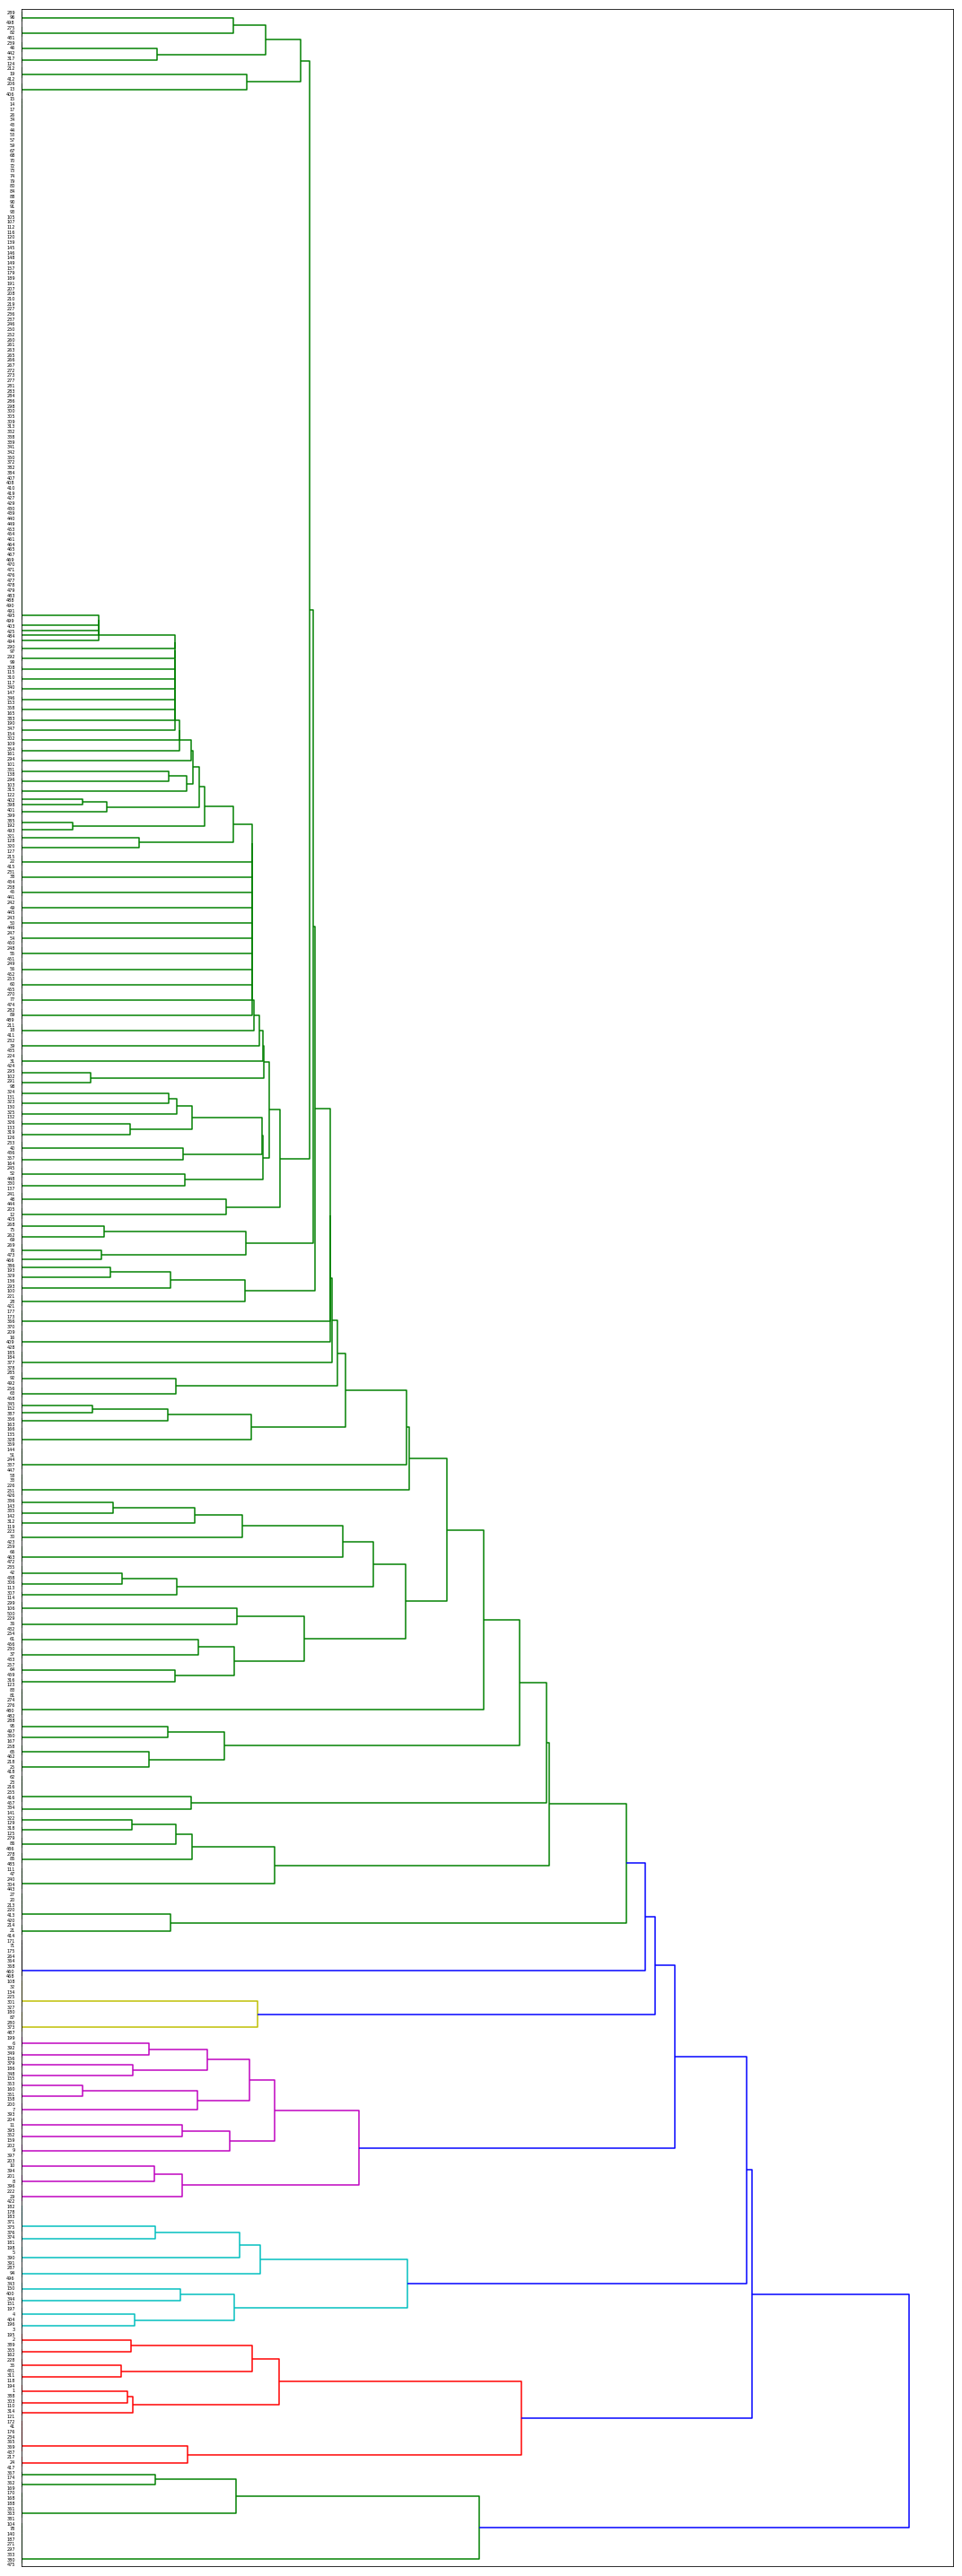

In [0]:
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15,40)) # set size
labelList = range(1, 501)


ax = dendrogram(linkage_matrix, orientation="right", labels=labelList);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='false',      # ticks along the bottom edge are off
    top='false',         # ticks along the top edge are off
    labelbottom='false')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
# plt.savefig('ward_clusters.png', dpi=1000) #save figure as ward_clusters


